# __KPMG Virtual Internship Module 2__

## Data Insights

In [1]:
# Import packages
import os
os.chdir('C:\\Users\\david\\OneDrive\\桌面\\Job Getter\\Virtual Internship\\KPMG\Module 2')
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime as dt
import missingno as msno

In [2]:
# Set aesthetics
sns.set()

In [3]:
# Import data
xls1 = pd.ExcelFile('KPMG_VI_New_raw_data_update_final - Cleaned.xlsx')
xls2 = pd.ExcelFile('KPMG_VI_New_raw_data_update_final_v2.xlsx')
xls2.sheet_names

['Title Sheet',
 'Transactions',
 'NewCustomerList',
 'CustomerDemographic',
 'CustomerAddress']

In [4]:
df1 = pd.read_excel(xls1, 'Transactions')
df2 = pd.read_excel(xls1, 'CustomerDemographic')
df3 = pd.read_excel(xls1, 'CustomerAddress')
df4 = pd.read_excel(xls2, 'NewCustomerList', header=1)
df4 = df4[df4.filter(regex='^(?!Unnamed)').columns]

### I. Data Cleaning

In [5]:
# Take a look at Tranctions data
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [6]:
# Take a look at CustomersDemographic data
df2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [7]:
# Take a look at CustomerAddress data
df3.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [8]:
# Take a look at NewCustomerList data
df4.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


#### 1. Incorrect Data Type

In [9]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [10]:
df4.sort_values(by = 'DOB').tail()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
775,Dmitri,Viant,U,62,NaT,Paralegal,Financial Services,Affluent Customer,N,No,5,95960 Warner Parkway,3842,VIC,Australia,1,774,0.626875
835,Porty,Hansed,U,88,NaT,General Manager,IT,Mass Customer,N,No,13,768 Southridge Drive,2112,NSW,Australia,11,832,0.575000
883,Shara,Bramhill,U,24,NaT,NaN,IT,Affluent Customer,N,No,2,01 Bunker Hill Drive,2230,NSW,Australia,10,883,0.531250
904,Roth,Crum,U,0,NaT,Legal Assistant,IT,Mass Customer,N,No,2,276 Anthes Court,2450,NSW,Australia,6,904,0.500000
984,Pauline,Dallosso,U,82,NaT,Desktop Support Technician,IT,Affluent Customer,N,Yes,0,9594 Badeau Street,2050,NSW,Australia,10,985,0.408000


#### 2. Inconsitent Categories

In [11]:
# Customer Demogrphac column 'gender'
df4 = df4.replace({'gender' : { 'Female' : 'F', 'Male':'M'}})
df4['gender'].value_counts()

F    513
M    470
U     17
Name: gender, dtype: int64

#### 3. Missing Data

In [12]:
# Define missing data summary function
def missing_sum(df):
    missing = df.isna().sum()
    missing = missing[missing > 0]
    missing_percentage = round(missing/df.shape[0], 2)
    missing_table = pd.DataFrame({'na_count': missing, 'na_%': missing_percentage}).sort_values(by = 'na_%', ascending = False)
    return missing_table

In [13]:
# Missing data summary
missing_sum(df4)

,na_count,na_%
job_industry_category,165,0.16
job_title,106,0.11
last_name,29,0.03
DOB,17,0.02


### II. Create Variables for RFM Analysis

In [14]:
# Create column 'profit'
df1['profit'] = df1['list_price'] - df1['standard_cost']

In [15]:
# Statistical summary and distribution of profit
df1['profit'].describe()

count    19803.000000
mean       551.950915
std        493.412849
min          4.800000
25%        133.780000
50%        445.210000
75%        830.240000
max       1702.550000
Name: profit, dtype: float64

<AxesSubplot:xlabel='profit', ylabel='Count'>

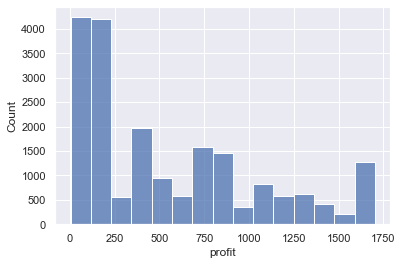

In [16]:
sns.histplot(data=df1, x='profit', label='profit', bins=15)

In [17]:
# Create column 'age'

# Define age calculating function
def calculate_age(born):
    today = dt.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df2['age'] = df2['DOB'].apply(lambda x:calculate_age(x))

In [18]:
# Statistical summary and distribution of age
df2['age'].describe()

count    3913.000000
mean       43.522617
std        12.802598
min        19.000000
25%        34.000000
50%        44.000000
75%        53.000000
max       177.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

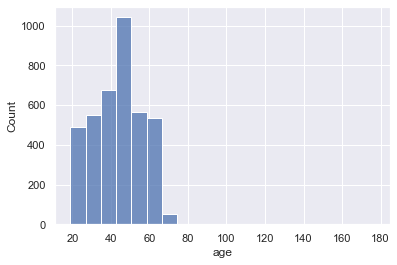

In [19]:
sns.histplot(df2['age'].dropna(), bins=20)

In [20]:
df2[df2['age']>=70]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,177.0
657,658,Donn,Bonnell,M,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8.0,77.0
719,720,Darrel,Canet,M,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6.0,89.0
1091,1092,Katlin,Creddon,F,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,No,5.0,85.0
2412,2413,Abbey,Murrow,M,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17.0,77.0
3409,3410,Merrili,Brittin,F,93,1940-09-22,NaN,Property,Mass Customer,N,No,16.0,80.0


In [21]:
# Drop the row with invalid age
df2 = df2.drop([33])

In [22]:
df2['deceased_indicator'].value_counts()

N    3997
Y       2
Name: deceased_indicator, dtype: int64

In [23]:
# Drop deceased customers
df2 = df2[df2['deceased_indicator'] == 'N']

### III. RMF Analysis


In [24]:
df_new = df2.merge(df1, on = 'customer_id').merge(df3, on = 'customer_id')

In [25]:
df_new.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'profit', 'address',
       'postcode', 'state', 'country', 'property_valuation'],
      dtype='object')

In [26]:
df_temp = df_new[['customer_id', 'product_id', 'transaction_id', 'transaction_date', 'profit']]
df_temp.head()

,customer_id,product_id,transaction_id,transaction_date,profit
0,1,86,94,2017-12-23,110.56
1,1,38,3765,2017-04-06,751.02
2,1,47,5157,2017-05-11,189.28
3,1,72,9785,2017-01-05,90.10
4,1,2,13424,2017-02-21,17.87


In [27]:
print(f"Min:{df_temp['transaction_date'].min()}; Max:{df_temp['transaction_date'].max()}")

Min:2017-01-01 00:00:00; Max:2017-12-30 00:00:00


In [28]:
# Set the day after the most recent date as our hypothetical snapshot_date
snapshot_date = df_temp['transaction_date'].max() + dt.timedelta(days=1)
print(snapshot_date)

2017-12-31 00:00:00


In [29]:
# Aggregate data by customer_id
df_rfm = df_temp.groupby(['customer_id']).agg({
    'transaction_date': lambda x: (snapshot_date - x.max()).days,
    'transaction_id': 'count',
    'profit': 'sum'})

# Rename columns
df_rfm.rename(columns = {'transaction_date': 'recency',
                           'transaction_id': 'frequency',
                           'profit': 'monetary_value'}, inplace=True)

# Check the first few rows 
df_rfm.head()

,recency,frequency,monetary_value
customer_id,,,
1,8,11,3018.09
2,129,3,2226.26
4,196,2,220.57
5,17,6,2394.94
6,65,5,3946.55


In [30]:
# Calculate RMF metrics 
# Calculate r_score
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(df_rfm['recency'], 4, labels=r_labels)
# Calculate f_score and m_score
fm_labels = range(0, 4, 1)
f_quartiles = pd.qcut(df_rfm['frequency'], 4, labels=fm_labels)
m_quartiles = pd.qcut(df_rfm['monetary_value'], 4, labels=fm_labels)

df_rfm = df_rfm.assign(r_score = r_quartiles.values, f_score=f_quartiles.values, m_score=m_quartiles.values)
df_rfm.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
1,8,11,3018.09,4,3,2
2,129,3,2226.26,1,0,1
4,196,2,220.57,1,0,0
5,17,6,2394.94,4,1,1
6,65,5,3946.55,2,1,2


In [46]:
def join_rfm(df):
    return str(df.r_score)+str(df.f_score)+str(df.m_score)
df_rfm['rfm_segment'] = df_rfm.apply(join_rfm, axis=1)

df_rfm['rfm_score'] = df_rfm[['r_score', 'f_score', 'm_score']].sum(axis=1)

df_rfm.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_segment,rfm_score,customer_segment
customer_id,,,,,,,,,
1,8,11,3018.09,4,3,2,432,9,Platinum
2,129,3,2226.26,1,0,1,101,2,Bronze
4,196,2,220.57,1,0,0,100,1,Bronze
5,17,6,2394.94,4,1,1,411,6,Silver
6,65,5,3946.55,2,1,2,212,5,Bronze


In [32]:
df_rfm.rfm_score.value_counts()

5     470
4     458
6     408
3     390
7     380
8     332
2     304
1     298
9     281
10    166
Name: rfm_score, dtype: int64

<AxesSubplot:xlabel='rfm_score', ylabel='Count'>

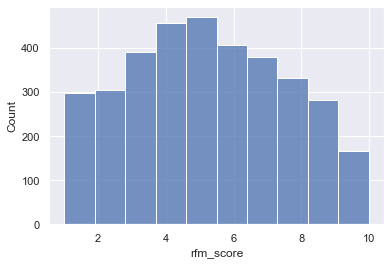

In [33]:
sns.histplot(df_rfm['rfm_score'], bins=10)

In [47]:
def get_segment(df):
    if df['rfm_score'] >= 9:
        return 'Platinum'
    elif df['rfm_score'] >= 7:
        return 'Gold'
    elif df['rfm_score'] >=6:
        return 'Silver'
    else:
        return 'Bronze'
df_rfm['customer_segment'] = df_rfm.apply(get_segment, axis=1)
df_rfm.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_segment,rfm_score,customer_segment
customer_id,,,,,,,,,
1,8,11,3018.09,4,3,2,432,9,Platinum
2,129,3,2226.26,1,0,1,101,2,Bronze
4,196,2,220.57,1,0,0,100,1,Bronze
5,17,6,2394.94,4,1,1,411,6,Silver
6,65,5,3946.55,2,1,2,212,5,Bronze


In [48]:
# Summary table 
df_rfm.groupby(['customer_segment', 'rfm_score']).agg({'recency':'mean', 
                                          'frequency':'mean', 
                                          'monetary_value':['mean', 'count']}).round(1).sort_values('rfm_score', ascending=False)

recency frequency monetary_value      
                              mean      mean           mean count
customer_segment rfm_score                                       
Platinum         10            8.6       9.5         6042.1   166
                 9            22.0       8.8         5286.1   281
Gold             8            32.9       7.8         4651.5   332
                 7            39.0       6.8         4036.1   380
Silver           6            39.7       6.0         3369.1   408
Bronze           5            52.5       5.4         2917.1   470
                 4            62.5       4.6         2325.5   458
                 3            81.3       4.2         1972.2   390
                 2           108.2       3.5         1564.8   304
                 1           167.9       2.6          937.2   298

### IV. Customer Segamentation with K-Means Clustering

### V. Exploratory Data Analysis


In [37]:
df1_temp = df1.groupby('customer_id').agg({'profit':'sum'})
df_target = df_rfm.merge(df2, on='customer_id').merge(df3, on='customer_id').merge(df1_temp, on='customer_id')

In [38]:
df_target.columns

Index(['customer_id', 'recency', 'frequency', 'monetary_value', 'r_score',
       'f_score', 'm_score', 'rfm_segment', 'rfm_score', 'customer_segment',
       'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'profit'],
      dtype='object')

<AxesSubplot:xlabel='age', ylabel='Count'>

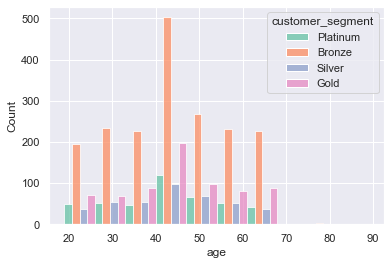

In [39]:
# Age distribution
sns.histplot(data=df_target, x='age', bins= 10, hue='customer_segment', multiple='dodge', palette='Set2')

>The greatest numbers of platinum and gold customers lie in the age 40-50 group.

In [40]:
df_target['gender'].value_counts()

F    1757
M    1654
U      76
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

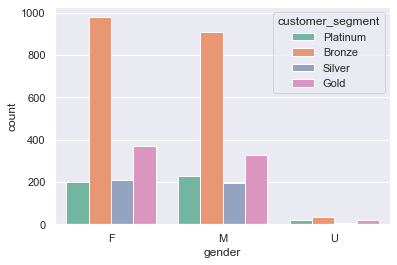

In [41]:
sns.countplot(data=df_target, x='gender', hue='customer_segment', palette='Set2')

>Gender doesn't seem to matter much.

<AxesSubplot:xlabel='state', ylabel='count'>

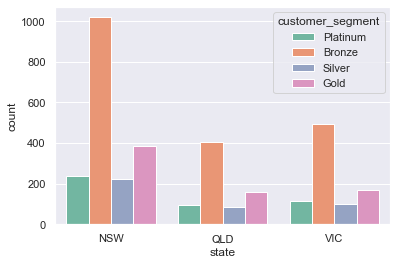

In [42]:
sns.countplot(data=df_target, x='state', hue='customer_segment', palette='Set2')

>Platinum and gold customers are likely to come from NSW

<AxesSubplot:xlabel='count', ylabel='job_industry_category'>

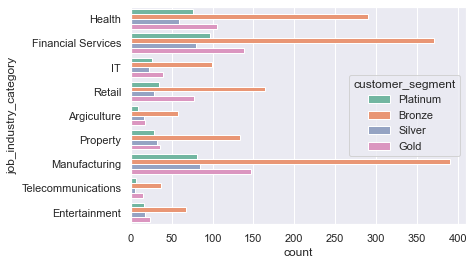

In [43]:
sns.countplot(data=df_target, y='job_industry_category', hue='customer_segment', palette='Set2')

<AxesSubplot:xlabel='wealth_segment', ylabel='count'>

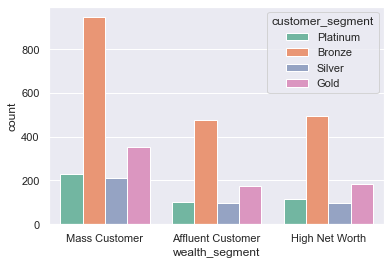

In [44]:
sns.countplot(data=df_target, x='wealth_segment', hue='customer_segment', palette='Set2')

>The effect of wealth on rfm_score matches our expectation.

In [45]:
df_target.to_excel('KPMG_VI_New_raw_data_update_final_target.xlsx', index=False)